In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer

In [133]:
# Load the uploaded housing dataset
df = pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [230]:
# Define binary categorical columns
binary_columns = [
    'mainroad',
    'guestroom',
    'basement',
    'hotwaterheating',
    'airconditioning',
    'prefarea'
]

# Map 'yes' → 1, 'no' → 0
def map_yes_no(column):
    return column.map({'yes': 1, 'no': 0})

# Apply mapping
df[binary_columns] = df[binary_columns].apply(map_yes_no)

# Optional: Check the result
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,NaN,NaN,NaN,NaN,NaN,2,NaN,furnished
1,12250000,8960,4,4,4,NaN,NaN,NaN,NaN,NaN,3,NaN,furnished
2,12250000,9960,3,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,semi-furnished
3,12215000,7500,4,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN,furnished
4,11410000,7420,4,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,furnished


In [ ]:
# Add intercept (bias) term to input matrix
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

# Compute the mean squared error cost
def compute_cost(X, y, theta):
    m = X.shape[0]
    predictions = X.dot(theta)
    errors = predictions - y
    squared_errors = np.square(errors)
    cost = (1 / (2 * m)) * np.sum(squared_errors)
    return cost

# Compute cost with L2 regularization
def compute_cost_regularized(X, y, theta, lamda):
    m = X.shape[0]
    predictions = X.dot(theta)
    errors = predictions - y
    squared_errors = np.sum(np.square(errors))
    reg_term = lamda * np.sum(np.square(theta))
    cost = (1 / (2 * m)) * (squared_errors + reg_term)
    return cost

# Gradient Descent with optional L2 regularization
def gradient_descent(X_train, y_train, X_test, y_test, n_epochs, lr=0.01, lamda=0):
    m = len(y_train)
    thetas = np.zeros((X_train.shape[1], 1))
    train_cost_history = []
    test_cost_history = []

    for epoch in range(n_epochs):
        # Compute predictions
        predictions = X_train @ thetas
        errors = predictions - y_train

        # Gradient with L2 regularization (excluding bias term from penalty)
        gradients = (X_train.T @ errors + lamda * np.vstack(([0], thetas[1:]))) / m
        thetas -= lr * gradients

        # Compute cost
        train_loss = np.mean((X_train @ thetas - y_train) ** 2) / 2
        test_loss = np.mean((X_test @ thetas - y_test) ** 2) / 2
        train_cost_history.append(train_loss)
        test_cost_history.append(test_loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Train Loss {train_loss}")
            print(f"Epoch {epoch}, Test Loss {test_loss}")

    return thetas, train_cost_history, test_cost_history

Problem 1.a

In [ ]:
# Define features and target column
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
data = df[num_vars]
target_column = 'price'

In [ ]:
# Separate inputs and target
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()

print("Input shape: " + str(inputs.shape))
print("Target shape: " + str(targets.shape))

Input shape: (545, 5)
Target shape: (545, 1)


In [ ]:
# Add intercept term (bias)
inputs = add_intercept(inputs)
print(inputs.shape)

(545, 6)


In [ ]:
# Initialize theta values
thetas = np.zeros((inputs.shape[1], 1))
print(thetas)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=42)

In [ ]:
# Set number of epochs and run gradient descent
n_epochs = 50
thetas, train_cost_history, test_cost_history = gradient_descent(
    X_train, y_train, X_test, y_test, n_epochs=n_epochs, lr=0.1
)

Epoch 0, Train Loss 10800895750834.354
Epoch 0, Test Loss 11618231204536.465
Epoch 10, Train Loss 2843396084726.8457
Epoch 10, Test Loss 3143710097224.4077
Epoch 20, Train Loss 1875949310198.4995
Epoch 20, Test Loss 1995988988923.2402
Epoch 30, Train Loss 1758330261969.551
Epoch 30, Test Loss 1815512139905.7876
Epoch 40, Train Loss 1744030484079.356
Epoch 40, Test Loss 1779295191697.0857


In [ ]:
# Show final theta values
print("Final Theta values:")
print(thetas)

Final Theta values:
[[6.20083064e+02]
 [4.70505573e+06]
 [2.30828293e+03]
 [1.22147657e+03]
 [1.71654236e+03]
 [7.07345786e+02]
 [2.60899737e+02]
 [3.70110425e+02]
 [7.81776667e+01]
 [5.21782111e+02]
 [9.20536376e+02]
 [3.49766414e+02]]


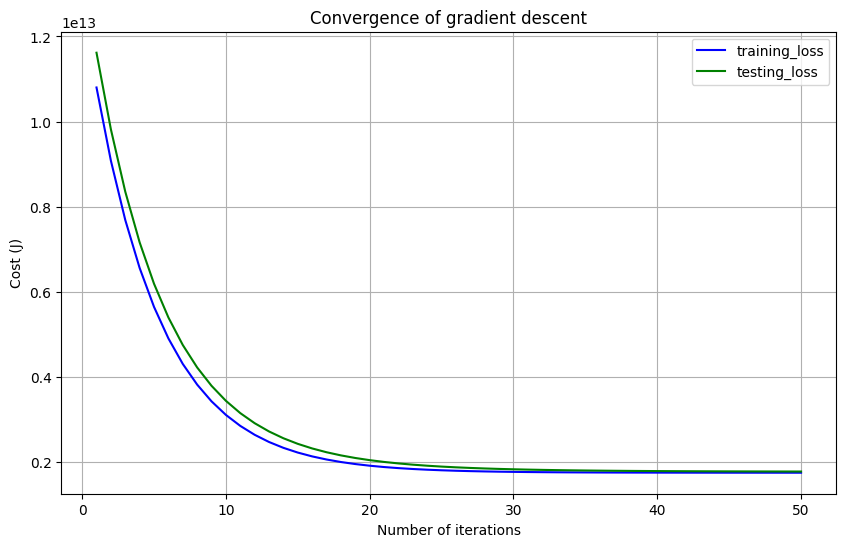

In [ ]:
# Plot training and testing cost
plt.plot(range(1, n_epochs + 1), train_cost_history, color='blue', label='training_loss')
plt.plot(range(1, n_epochs + 1), test_cost_history, color='green', label='testing_loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

Problem 1.b

In [ ]:
# Select additional features including binary categorical variables
num_vars = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
    'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
    'parking', 'prefarea', 'price'
]

data = df[num_vars]
target_column = 'price'

In [ ]:
# Split input features and target output
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()

print("Input shape: " + str(inputs.shape))
print("Target shape: " + str(targets.shape))

Input shape: (545, 11)
Target shape: (545, 1)


In [ ]:
# Add intercept term
inputs = add_intercept(inputs)
print(inputs.shape)

(545, 12)


In [ ]:
# Initialize theta values
thetas = np.zeros((inputs.shape[1], 1))
print(thetas)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.20, random_state=0)

In [ ]:
# Set training configuration and run gradient descent
n_epochs = 50
thetas, train_cost_history, test_cost_history = gradient_descent(
    X_train, y_train, X_test, y_test, lr=0.1, n_epochs=n_epochs
)

Epoch 0, Train Loss 10800895750834.354
Epoch 0, Test Loss 11618231204536.465
Epoch 10, Train Loss 2843396084726.8457
Epoch 10, Test Loss 3143710097224.4077
Epoch 20, Train Loss 1875949310198.4995
Epoch 20, Test Loss 1995988988923.2402
Epoch 30, Train Loss 1758330261969.551
Epoch 30, Test Loss 1815512139905.7876
Epoch 40, Train Loss 1744030484079.356
Epoch 40, Test Loss 1779295191697.0857


In [ ]:
# Print final learned parameters
print("Final Theta values:")
print(thetas)

Final Theta values:
[[6.20083064e+02]
 [4.70505573e+06]
 [2.30828293e+03]
 [1.22147657e+03]
 [1.71654236e+03]
 [7.07345786e+02]
 [2.60899737e+02]
 [3.70110425e+02]
 [7.81776667e+01]
 [5.21782111e+02]
 [9.20536376e+02]
 [3.49766414e+02]]


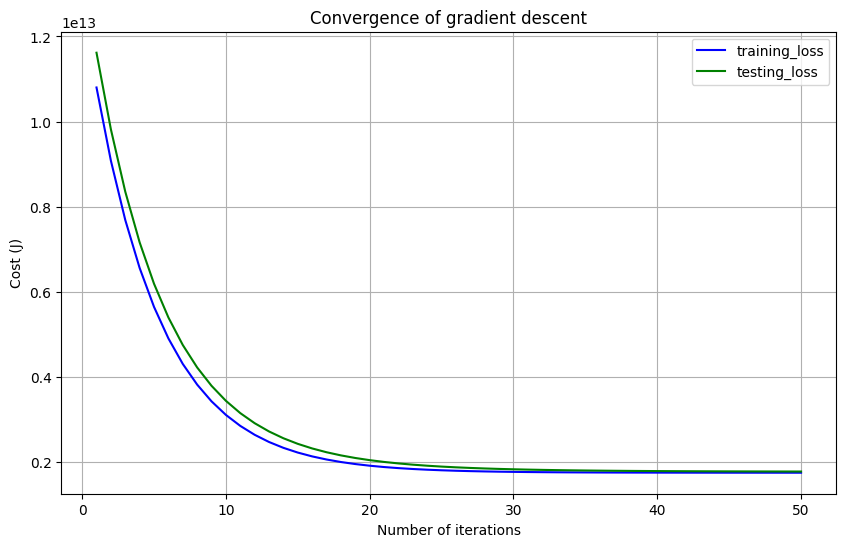

In [ ]:
# Plot cost vs. iterations
plt.plot(range(1, n_epochs + 1), train_cost_history, color='blue', label='training_loss')
plt.plot(range(1, n_epochs + 1), test_cost_history, color='green', label='testing_loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.legend()
plt.show()

Problem 2.a

*   Using Standardization as Pre-processing



In [192]:
# Define numerical variables including the target 'price'
num_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
data = df[num_columns]

# Set the column to be predicted
target_column = 'price'

# Extract input features (X) and target values (y)
X = data.drop(columns=[target_column]).to_numpy()
y = data[[target_column]].to_numpy()

# Display shapes
print("Input shape:", X.shape)
print("Target shape:", y.shape)

Input shape: (545, 5)
Target shape: (545, 1)


In [193]:
# Apply custom transformation to inputs, e.g., adding a bias term
X = get_modified_inputs(X)
print("Modified input shape:", X.shape)

Modified input shape: (545, 6)


In [194]:
# Initialize theta values with zeros
theta = np.zeros((X.shape[1], 1))
print("Initial theta values:\n", theta)

Initial theta values:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [196]:
# Apply Standardization to inputs (zero mean, unit variance)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [197]:
# Split standardized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9
)

In [199]:
# Set number of epochs and learning rate
n_epochs = 50
learning_rate = 0.1

# Run gradient descent training
theta, train_costs, test_costs = gradient_descent(
    X_train, y_train, X_test, y_test, n_epochs=n_epochs, lr=learning_rate
)

Epoch 0, Train Loss 12649345745847.018
Epoch 0, Test Loss 13439764588975.14
Epoch 10, Train Loss 12098498502086.354
Epoch 10, Test Loss 12468443428323.857
Epoch 20, Train Loss 12076568503616.068
Epoch 20, Test Loss 12420286157666.277
Epoch 30, Train Loss 12072937749581.877
Epoch 30, Test Loss 12424427879660.54
Epoch 40, Train Loss 12072044696294.588
Epoch 40, Test Loss 12429236651318.465


In [200]:
# Print training and testing loss every 10 epochs
for epoch in range(0, n_epochs, 10):
    print(f"Epoch {epoch}, Train Loss: {train_costs[epoch]:.2f}")
    print(f"Epoch {epoch}, Test Loss: {test_costs[epoch]:.2f}")

Epoch 0, Train Loss: 12649345745847.02
Epoch 0, Test Loss: 13439764588975.14
Epoch 10, Train Loss: 12098498502086.35
Epoch 10, Test Loss: 12468443428323.86
Epoch 20, Train Loss: 12076568503616.07
Epoch 20, Test Loss: 12420286157666.28
Epoch 30, Train Loss: 12072937749581.88
Epoch 30, Test Loss: 12424427879660.54
Epoch 40, Train Loss: 12072044696294.59
Epoch 40, Test Loss: 12429236651318.46


In [201]:
# Display the final learned parameters
print("\nFinal Theta values:")
print(theta)


Final Theta values:
[[     0.        ]
 [673111.12586114]
 [ 65516.22846985]
 [634529.24655439]
 [317089.20721105]
 [300999.35506533]]


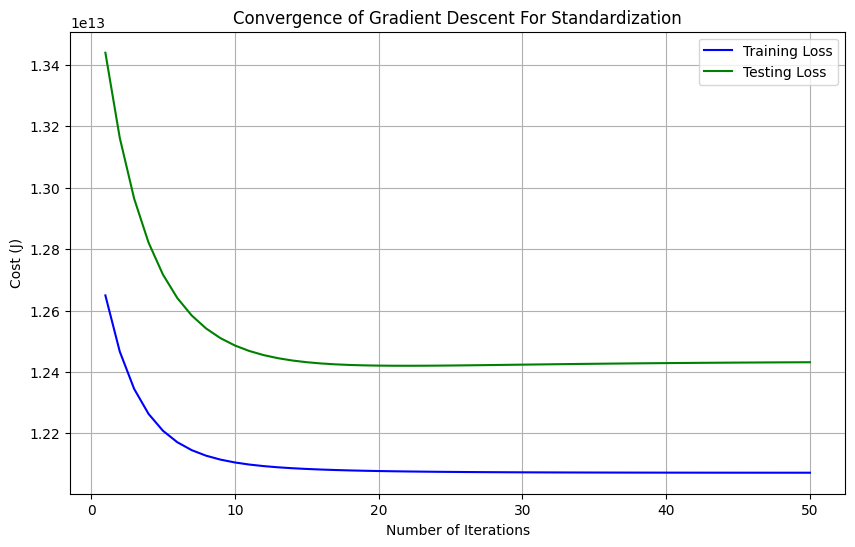

In [203]:
# Plot cost function vs. epochs for both training and testing
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_costs, color='blue', label='Training Loss')
plt.plot(range(1, n_epochs + 1), test_costs, color='green', label='Testing Loss')
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent For Standardization')
plt.legend()
plt.show()


*   Using Normalization as Pre-processing



In [215]:
# Select relevant numerical columns including the target
num_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
data = df[num_columns]

# Separate features (X) and target (y)
target_column = 'price'
X = data.drop(columns=[target_column]).to_numpy()
y = data[[target_column]].to_numpy()

# Display shapes
print("Input shape:", X.shape)
print("Target shape:", y.shape)

Input shape: (545, 5)
Target shape: (545, 1)


In [216]:
# Modify input features if necessary (e.g., add bias column)
X = get_modified_inputs(X)
print("Modified input shape:", X.shape)

Modified input shape: (545, 6)


In [217]:
# Initialize theta (weights) with zeros
theta = np.zeros((X.shape[1], 1))
print("Initial theta values:\n", theta)

Initial theta values:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [218]:
# Normalize the input features using L2 normalization
normalizer = Normalizer()
X = normalizer.fit_transform(X)

In [219]:
# Split data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9
)

In [221]:
# Set training parameters
n_epochs = 50
learning_rate = 0.1

# Train using gradient descent function
theta, train_costs, test_costs = gradient_descent(
    X_train, y_train, X_test, y_test, n_epochs=n_epochs, lr=learning_rate
)

Epoch 0, Train Loss 10800895653085.328
Epoch 0, Test Loss 11618231099079.879
Epoch 10, Train Loss 2843395993760.917
Epoch 10, Test Loss 3143709978656.5034
Epoch 20, Train Loss 1875949340246.9148
Epoch 20, Test Loss 1995988998865.1807
Epoch 30, Train Loss 1758330325116.3228
Epoch 30, Test Loss 1815512189320.8508
Epoch 40, Train Loss 1744030557258.9685
Epoch 40, Test Loss 1779295254433.0784


In [222]:
# Print training and testing cost at every 10th epoch
for epoch in range(0, n_epochs, 10):
    print(f"Epoch {epoch}, Train Loss {train_costs[epoch]:.2f}")
    print(f"Epoch {epoch}, Test Loss {test_costs[epoch]:.2f}")

Epoch 0, Train Loss 10800895653085.33
Epoch 0, Test Loss 11618231099079.88
Epoch 10, Train Loss 2843395993760.92
Epoch 10, Test Loss 3143709978656.50
Epoch 20, Train Loss 1875949340246.91
Epoch 20, Test Loss 1995988998865.18
Epoch 30, Train Loss 1758330325116.32
Epoch 30, Test Loss 1815512189320.85
Epoch 40, Train Loss 1744030557258.97
Epoch 40, Test Loss 1779295254433.08


In [223]:
# Final optimized weights
print("\nFinal Theta values:")
print(theta)


Final Theta values:
[[6.20083000e+02]
 [4.70505571e+06]
 [2.30828277e+03]
 [1.22147651e+03]
 [1.71654227e+03]
 [9.20536396e+02]]


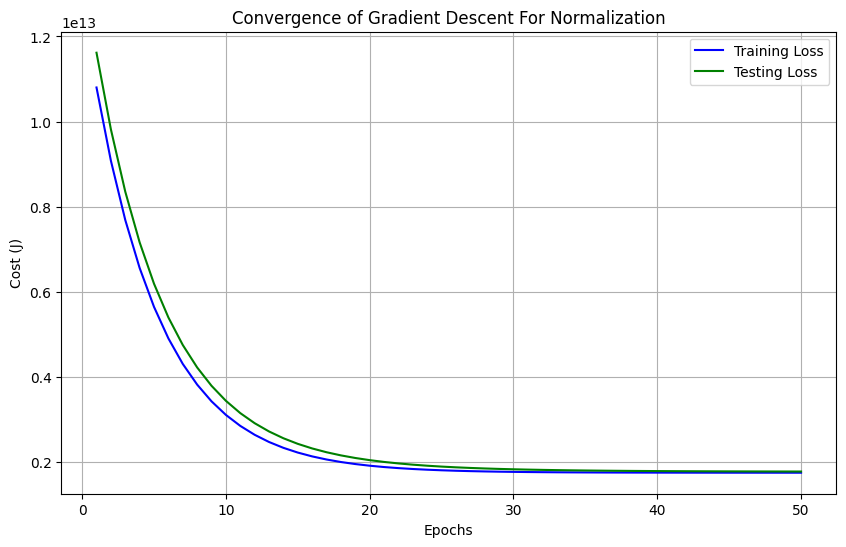

In [224]:
# Plot the cost function for both training and testing data
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_costs, color='blue', label='Training Loss')
plt.plot(range(1, n_epochs + 1), test_costs, color='green', label='Testing Loss')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent For Normalization')
plt.legend()
plt.show()

Problem 2.b

*  Using Normalization as Pre-processing



In [269]:
# Select feature columns including target
num_vars = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
    'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
    'parking', 'prefarea', 'price'
]

# Extract subset from DataFrame
data = df[num_vars]

# Define target column
target_column = 'price'

# Split into inputs and targets
inputs = data.drop([target_column], axis=1).to_numpy()
targets = data[[target_column]].to_numpy()

# Print input and target shapes
print("Input shape:", inputs.shape)
print("Target shape:", targets.shape)

# Replace NaN values with 0 to avoid Normalizer errors
inputs = np.nan_to_num(inputs)

Input shape: (545, 11)
Target shape: (545, 1)


In [264]:
# Apply custom input transformation (e.g., add bias term)
inputs = get_modified_inputs(inputs)
print(inputs.shape)

(545, 12)


In [265]:
# Initialize theta as zero
thetas = np.zeros([inputs.shape[1], 1])
print(thetas)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [270]:
# Normalize the input features using L2 normalization
norm = Normalizer().fit(inputs)
inputs = norm.transform(inputs)

In [271]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    inputs, targets, test_size=0.20, random_state=9
)

In [277]:
# Set number of epochs
n_epochs = 50

# Run gradient descent
thetas, train_cost_history, test_cost_history = gradient_descent(
    X_train, y_train, X_test, y_test,
    n_epochs=n_epochs, lr=0.1
)

Epoch 0, Train Loss 10800895638613.574
Epoch 0, Test Loss 11618231084061.71
Epoch 10, Train Loss 2843395986650.7886
Epoch 10, Test Loss 3143709969017.562
Epoch 20, Train Loss 1875949359000.794
Epoch 20, Test Loss 1995989015217.1294
Epoch 30, Train Loss 1758330356469.2231
Epoch 30, Test Loss 1815512218465.7112
Epoch 40, Train Loss 1744030597711.981
Epoch 40, Test Loss 1779295292658.9917


In [278]:
# Output training and test loss every 10 epochs
for epoch in range(0, n_epochs, 10):
    print(f"Epoch {epoch}, Train Loss: {train_cost_history[epoch]}")
    print(f"Epoch {epoch}, Test Loss: {test_cost_history[epoch]}")

Epoch 0, Train Loss: 10800895638613.574
Epoch 0, Test Loss: 11618231084061.71
Epoch 10, Train Loss: 2843395986650.7886
Epoch 10, Test Loss: 3143709969017.562
Epoch 20, Train Loss: 1875949359000.794
Epoch 20, Test Loss: 1995989015217.1294
Epoch 30, Train Loss: 1758330356469.2231
Epoch 30, Test Loss: 1815512218465.7112
Epoch 40, Train Loss: 1744030597711.981
Epoch 40, Test Loss: 1779295292658.9917


In [281]:
print("\nFinal Theta values:")
print(thetas)


Final Theta values:
[[4.70505571e+06]
 [2.30828270e+03]
 [1.22147649e+03]
 [1.71654224e+03]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [9.20536409e+02]
 [0.00000000e+00]]


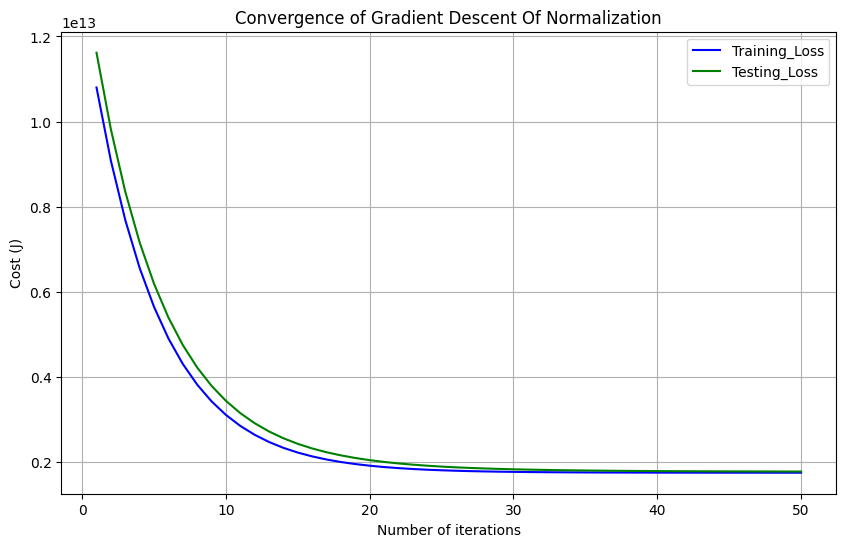

In [282]:
plt.plot(range(1, n_epochs + 1), train_cost_history, color='blue', label='Training_Loss')
plt.plot(range(1, n_epochs + 1), test_cost_history, color='green', label='Testing_Loss')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent Of Normalization')
plt.legend()
plt.show()

Using Standardization as Pre-processing

In [283]:
# Select relevant columns including target
num_vars = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
    'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
    'parking', 'prefarea', 'price'
]

# Extract selected data
data = df[num_vars]
target_column = 'price'

# Separate inputs and targets
inputs = data.drop(columns=[target_column]).to_numpy()
targets = data[[target_column]].to_numpy()

# Display shapes
print("Input shape:", inputs.shape)
print("Target shape:", targets.shape)

Input shape: (545, 11)
Target shape: (545, 1)


In [284]:
# Apply bias or other input modifications
inputs = get_modified_inputs(inputs)
print("Modified input shape:", inputs.shape)

Modified input shape: (545, 12)


In [285]:
# Initialize theta parameters
thetas = np.zeros([inputs.shape[1], 1])
print("Initial theta values:\n", thetas)

Initial theta values:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [290]:
# Fix NaNs and zero-variance columns before scaling
inputs = np.nan_to_num(inputs)
variances = np.var(inputs, axis=0)
inputs = inputs[:, variances > 0]

In [291]:
# Standardize features (column-wise) to zero mean and unit variance
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs)

In [293]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    inputs, targets, test_size=0.2, random_state=9
)

In [294]:
# Define training parameters
n_epochs = 50
learning_rate = 0.1

# Train the model
thetas, train_cost_history, test_cost_history = gradient_descent(
    X_train, y_train, X_test, y_test,
    n_epochs=n_epochs, lr=learning_rate
)

Epoch 0, Train Loss 12649345745847.018
Epoch 0, Test Loss 13439764588975.14
Epoch 10, Train Loss 12098498502086.354
Epoch 10, Test Loss 12468443428323.857
Epoch 20, Train Loss 12076568503616.068
Epoch 20, Test Loss 12420286157666.277
Epoch 30, Train Loss 12072937749581.877
Epoch 30, Test Loss 12424427879660.541
Epoch 40, Train Loss 12072044696294.588
Epoch 40, Test Loss 12429236651318.465


In [295]:
# Print training and testing loss every 10 epochs
for epoch in range(0, n_epochs, 10):
    print(f"Epoch {epoch}, Train Loss: {train_cost_history[epoch]}")
    print(f"Epoch {epoch}, Test Loss: {test_cost_history[epoch]}")

Epoch 0, Train Loss: 12649345745847.018
Epoch 0, Test Loss: 13439764588975.14
Epoch 10, Train Loss: 12098498502086.354
Epoch 10, Test Loss: 12468443428323.857
Epoch 20, Train Loss: 12076568503616.068
Epoch 20, Test Loss: 12420286157666.277
Epoch 30, Train Loss: 12072937749581.877
Epoch 30, Test Loss: 12424427879660.541
Epoch 40, Train Loss: 12072044696294.588
Epoch 40, Test Loss: 12429236651318.465


In [299]:
# Display final theta values
print("\nFinal Theta values:")
print(thetas)


Final Theta values:
[[673111.12586114]
 [ 65516.22846985]
 [634529.24655439]
 [317089.20721105]
 [300999.35506533]]


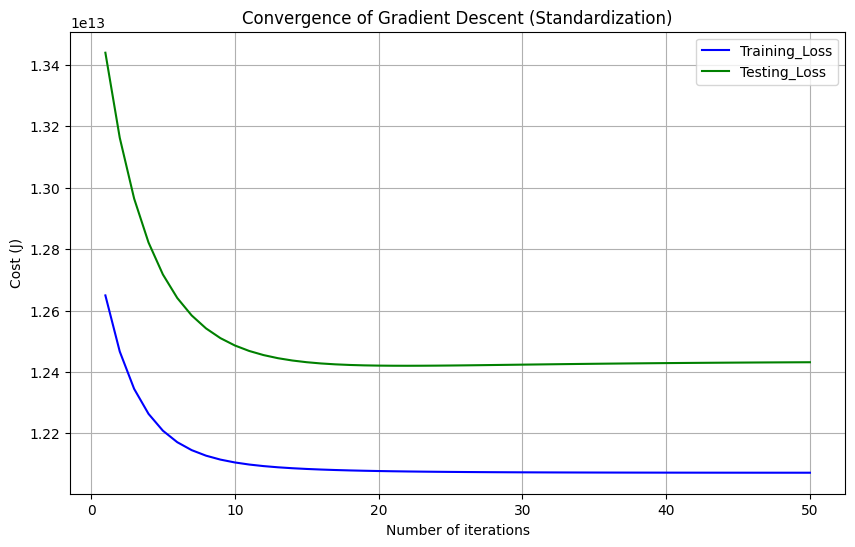

In [300]:
# Plot training and testing cost over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_cost_history, color='blue', label='Training_Loss')
plt.plot(range(1, n_epochs + 1), test_cost_history, color='green', label='Testing_Loss')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent (Standardization)')
plt.legend()
plt.show()

Problem 3.a

*    Using normalization as pre processing



In [301]:
# Define numerical columns including the target
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
data = df[num_vars]

# Define the target column
target_column = 'price'

# Separate inputs and targets
inputs = data.drop(columns=[target_column]).to_numpy()
targets = data[[target_column]].to_numpy()

# Display shapes
print("Input shape:", inputs.shape)
print("Target shape:", targets.shape)

Input shape: (545, 5)
Target shape: (545, 1)


In [302]:
# Apply input modifications (e.g., add bias column)
inputs = get_modified_inputs(inputs)
print("Modified input shape:", inputs.shape)

# Initialize theta values with zeros
thetas = np.zeros([inputs.shape[1], 1])
print("Initial theta values:\n", thetas)

Modified input shape: (545, 6)
Initial theta values:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [303]:
# Normalize input features row-wise using L2 normalization
norm = Normalizer()
inputs = norm.fit_transform(inputs)

In [304]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    inputs, targets, test_size=0.20, random_state=9
)

In [306]:
# Define training parameters
n_epochs = 50
learning_rate = 0.1
lamda = 5  # regularization parameter

# Run training
thetas, train_cost_history, test_cost_history = gradient_descent(
    X_train, y_train, X_test, y_test,
    n_epochs=n_epochs, lr=learning_rate, lamda=lamda
)

Epoch 0, Train Loss 10800895653085.328
Epoch 0, Test Loss 11618231099079.879
Epoch 10, Train Loss 2867808577785.0586
Epoch 10, Test Loss 3171173351350.195
Epoch 20, Train Loss 1894252879058.6772
Epoch 20, Test Loss 2020677541329.5195
Epoch 30, Train Loss 1767386461368.3296
Epoch 30, Test Loss 1832897533030.553
Epoch 40, Train Loss 1748397002818.3098
Epoch 40, Test Loss 1792937896035.1204


In [307]:
# Show training and validation loss at every 10th epoch
for epoch in range(0, n_epochs, 10):
    print(f"Epoch {epoch}, Train Loss: {train_cost_history[epoch]}")
    print(f"Epoch {epoch}, Test Loss: {test_cost_history[epoch]}")

Epoch 0, Train Loss: 10800895653085.328
Epoch 0, Test Loss: 11618231099079.879
Epoch 10, Train Loss: 2867808577785.0586
Epoch 10, Test Loss: 3171173351350.195
Epoch 20, Train Loss: 1894252879058.6772
Epoch 20, Test Loss: 2020677541329.5195
Epoch 30, Train Loss: 1767386461368.3296
Epoch 30, Test Loss: 1832897533030.553
Epoch 40, Train Loss: 1748397002818.3098
Epoch 40, Test Loss: 1792937896035.1204


In [308]:
# Print the final trained parameters
print("\nFinal Theta values:")
print(thetas)


Final Theta values:
[[6.57476513e+02]
 [4.65319871e+06]
 [2.29631486e+03]
 [1.20997497e+03]
 [1.70019992e+03]
 [9.05374150e+02]]


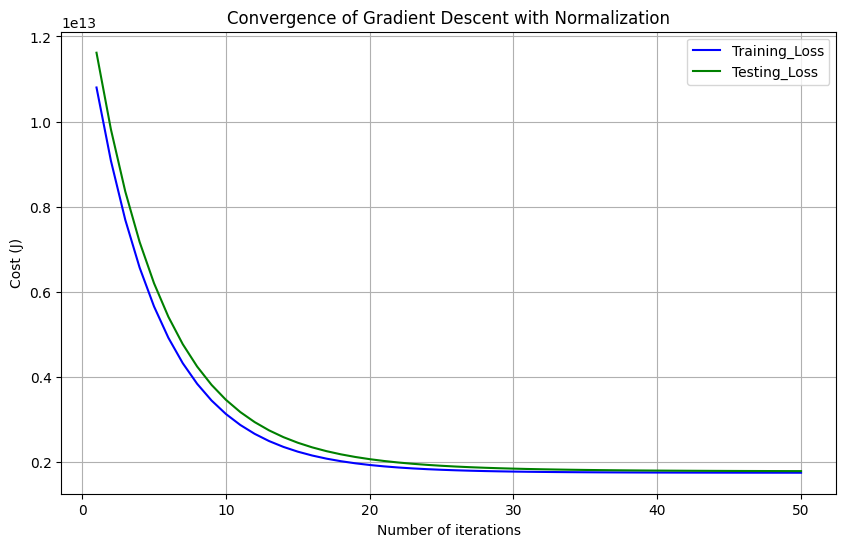

In [309]:
# Plot training and testing cost over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_cost_history, color='blue', label='Training_Loss')
plt.plot(range(1, n_epochs + 1), test_cost_history, color='green', label='Testing_Loss')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent with Normalization')
plt.legend()
plt.show()

3.b Using Normalization as pre processing

In [317]:
# Select columns including additional categorical features and the target
num_vars = [
    'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
    'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
    'parking', 'prefarea', 'price'
]

# Load the relevant data
data = df[num_vars]
target_column = 'price'

# Split inputs and target
inputs = data.drop(columns=[target_column]).to_numpy()
targets = data[[target_column]].to_numpy()

print("Input shape:", inputs.shape)
print("Target shape:", targets.shape)

Input shape: (545, 11)
Target shape: (545, 1)


In [318]:
# Add bias term or modify inputs as needed
inputs = get_modified_inputs(inputs)
print("Modified input shape:", inputs.shape)

# Initialize theta (parameter vector)
thetas = np.zeros([inputs.shape[1], 1])
print("Initial theta values:\n", thetas)

Modified input shape: (545, 12)
Initial theta values:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [321]:
inputs = np.nan_to_num(inputs)

# Normalize each input row to have unit norm
norm = Normalizer()
inputs = norm.fit_transform(inputs)

In [322]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    inputs, targets, test_size=0.20, random_state=9
)

In [324]:
# Set training parameters
n_epochs = 50
learning_rate = 0.2
lamda = 3  # L2 regularization strength

# Perform training using gradient descent with regularization
thetas, train_cost_history, test_cost_history = gradient_descent(
    X_train, y_train, X_test, y_test,
    n_epochs=n_epochs, lr=learning_rate, lamda=lamda
)

Epoch 0, Train Loss 8899657169573.674
Epoch 0, Test Loss 9628792228063.799
Epoch 10, Train Loss 1833741657579.235
Epoch 10, Test Loss 1937134879840.4421
Epoch 20, Train Loss 1744797162356.4685
Epoch 20, Test Loss 1782148666623.5034
Epoch 30, Train Loss 1742725883126.0283
Epoch 30, Test Loss 1773107239997.8345
Epoch 40, Train Loss 1742588704045.2446
Epoch 40, Test Loss 1772234412252.8254


In [325]:
# Print training and testing loss every 10 epochs
for epoch in range(0, n_epochs, 10):
    print(f"Epoch {epoch}, Train Loss: {train_cost_history[epoch]}")
    print(f"Epoch {epoch}, Test Loss: {test_cost_history[epoch]}")

Epoch 0, Train Loss: 8899657169573.674
Epoch 0, Test Loss: 9628792228063.799
Epoch 10, Train Loss: 1833741657579.235
Epoch 10, Test Loss: 1937134879840.4421
Epoch 20, Train Loss: 1744797162356.4685
Epoch 20, Test Loss: 1782148666623.5034
Epoch 30, Train Loss: 1742725883126.0283
Epoch 30, Test Loss: 1773107239997.8345
Epoch 40, Train Loss: 1742588704045.2446
Epoch 40, Test Loss: 1772234412252.8254


In [326]:
# Output final model parameters
print("\nFinal Theta values:")
print(thetas)


Final Theta values:
[[2.28796405e+02]
 [4.69704972e+06]
 [1.54334151e+03]
 [1.10863102e+03]
 [1.56808311e+03]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.20232570e+03]
 [0.00000000e+00]]


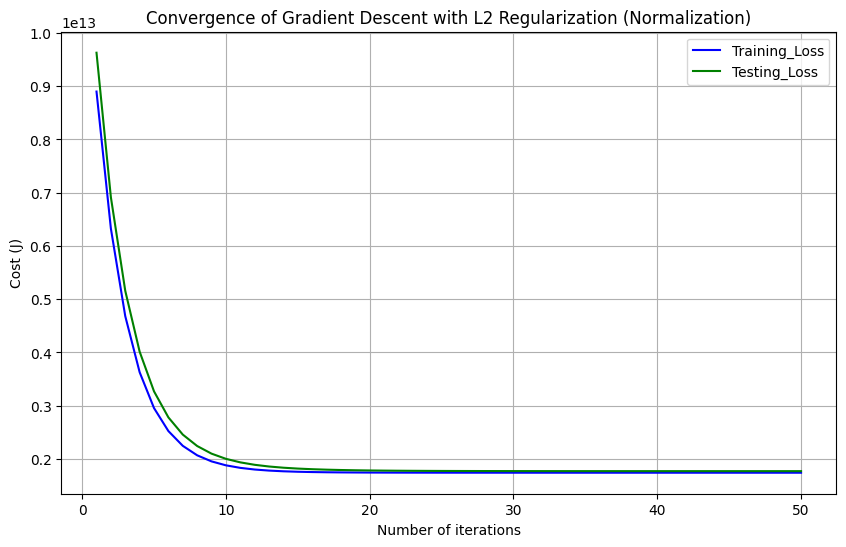

In [327]:
# Plot convergence curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epochs + 1), train_cost_history, color='blue', label='Training_Loss')
plt.plot(range(1, n_epochs + 1), test_cost_history, color='green', label='Testing_Loss')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent with L2 Regularization (Normalization)')
plt.legend()
plt.show()